In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#                                                   Dataset
```js
        You can see the theory part here -> https://youtu.be/WnBYW_DX3sM?si=cfqBkJTC8iFOrprx.
```

         x1        x2  y
0  2.115098 -0.046244  1
1  0.882490 -0.075756  0
2 -0.055144 -0.037332  1
3  0.829545 -0.539321  1
4  2.112857  0.662084  1


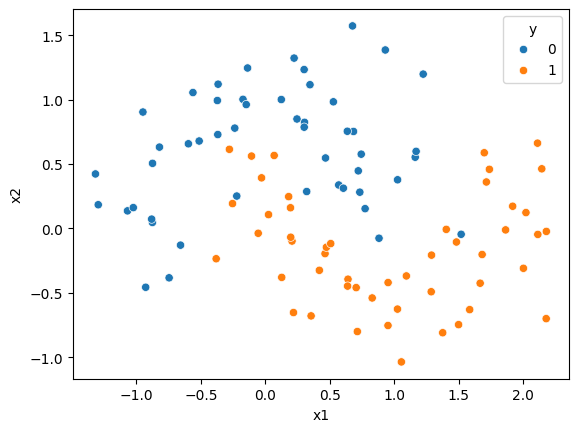

In [ ]:
df = ( pd.read_csv(r"D:\VS CODE\Data Science\Machine Learning\2. Logistic Regression\Dataset\ushape.csv")
      .rename(columns = {'3.159499363321345566e-02':'x1', '9.869877579082642072e-01':'x2', '0.000000000000000000e+00':'y'})
      .assign(y = lambda df1: df1['y'].astype('int8'))
     )

print(df.head(5))
sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'y')
plt.show()

explanation = """
As you can see in "non_logistic.png" that we can't draw such line because at the above of the Red Boundary Line there are a lot
of orange points and at the below of the Red Boundary Line there are a lot of blue points. So the errors are higher here.

In this scenerio we need to transform our Input Data into Polynomial Dataset before training and testing.
"""

#                                               Before applying Polynomial Regression

In [93]:
X, y = df.iloc[:, :2], df.iloc[:, -1] # [x1, x2] => (99, 2), [y] => (99).

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) # (79, 2), (20, 2), (79), (20).

lr = LogisticRegression()
lr.fit(X = x_train, y = y_train)

print(f"Accuracy = {accuracy_score(y_true = y_test, y_pred = lr.predict(x_test))}.")

Accuracy = 0.95.


#                                           After applying Polynomial Regression

In [109]:
X, y = df.iloc[:, :2], df.iloc[:, -1] # [x1, x2] => (99, 2), [y] => (99).

poly = PolynomialFeatures(degree = 2)
X_trans = poly.fit_transform(X) # (99, 6). returns numpy array. This data is only for training and testing on behalf of X.
y = y.values # since X_trans is numpy array. y also is numpy array now.

x_train, x_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=2) # (79, 6), (20, 6), (79), (20).

lr = LogisticRegression()
lr.fit(X = x_train, y = y_train)

print(f"Accuracy = {accuracy_score(y_true = y_test, y_pred = lr.predict(x_test))}.")

explanation = """
As we can see, we've improved our accuracy after applying Polynomial Regression on a Non Linear Logistic Regression data.
"""

Accuracy = 1.0.


#                                                   But we don't use it.
```js
        For Non Linear Logistic Regression we''ll use Decision Tree or Random Forest or any other method because they give more better result.
```